In [110]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")
df = df.astype({"Pclass":"str"})
df = df.replace({"Pclass" : {"1":"1st", "2":"2nd", "3":"3nd"}})
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3nd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3nd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3nd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3nd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [111]:
#전처리
df_selected = df[{"Survived", "Age", "Parch", "SibSp", "Fare", "Pclass", "Sex", "Embarked"}].dropna()

#Age와 Fare 정규화
df_selected["Age"] = (df_selected["Age"] - df_selected["Age"].mean())/df_selected["Age"].std() #normalize
df_selected["Fare"] = (df_selected["Fare"] - df_selected["Fare"].mean())/df_selected["Age"].std() #normalize

#Label Encoding 방식 변환
# df_selected["Sex_number"] = df_selected["Sex"].replace("female", 1).replace("male", 2)
# df_selected["Embarked_number"] = df_selected["Embarked"].replace("C", 1).replace("Q", 2).replace("S", 3)

#One hot encoding 방식 변환
df_one_hot_encoded = pd.get_dummies(df[{"Pclass", "Sex", "Embarked", "Cabin"}])

df_selected = pd.merge(df_selected[{"Survived", "Age", "Parch", "SibSp", "Fare"}], df_one_hot_encoded, how="left", left_index=True, right_index=True)

display(df_selected)

,Age,SibSp,Parch,Fare,Survived,Embarked_C,Embarked_Q,Embarked_S,Pclass_1st,Pclass_2nd,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,-0.527298,1,0,-27.317251,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.576688,1,0,36.716049,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.251301,0,0,-26.642251,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.369691,1,0,18.532749,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.369691,0,0,-26.517251,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.645688,0,5,-5.442251,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
886,-0.182302,0,0,-21.567251,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
887,-0.734295,0,0,-4.567251,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
889,-0.251301,0,0,-4.567251,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
#데이터셋 분리
x = df_selected.drop("Survived", axis=1)
y = df_selected["Survived"]
display(x)
display(y)

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1st,Pclass_2nd,Pclass_3nd,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,-0.527298,1,0,-27.317251,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.576688,1,0,36.716049,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.251301,0,0,-26.642251,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.369691,1,0,18.532749,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.369691,0,0,-26.517251,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.645688,0,5,-5.442251,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
886,-0.182302,0,0,-21.567251,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
887,-0.734295,0,0,-4.567251,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,-0.251301,0,0,-4.567251,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, shuffle=True, random_state=34)
x_train, x_test, y_train, y_test = x_train.to_numpy(), x_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

display(x_train.shape)
display(y_train.shape)


(676, 159)

(676,)

In [114]:
# 네트워크 구조 정의. VGG를 차용하여 조금 수정함
class_counts = 2
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x_train.shape[1], 1)),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=class_counts, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss="sparse_categorical_crossentropy", 
            metrics=["accuracy"])

#계층, 차원, 파라미터 수 요약 확인
model.summary()


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 159)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 128)               20480     
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dense_111 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_113 (Dense)            (None, 256)             

클래스 갯수 : 2
에포크 횟수 : 50
Epoch 1/50
17/17 [==============================] - 0s 13ms/step - loss: 0.2566 - accuracy: 0.9019 - val_loss: 0.6783 - val_accuracy: 0.8235
Epoch 2/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2557 - accuracy: 0.9056 - val_loss: 0.5275 - val_accuracy: 0.8382
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2257 - accuracy: 0.9111 - val_loss: 0.7220 - val_accuracy: 0.8088
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 0.2131 - accuracy: 0.9130 - val_loss: 0.6465 - val_accuracy: 0.8162
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.2310 - accuracy: 0.9074 - val_loss: 0.6608 - val_accuracy: 0.8309
Epoch 6/50
17/17 [==============================] - 0s 12ms/step - loss: 0.2612 - accuracy: 0.8907 - val_loss: 0.5541 - val_accuracy: 0.8015
Epoch 7/50
17/17 [==============================] - 0s 15ms/step - loss: 0.2541 - accuracy: 0.8889 - val_loss: 0.5876 - val_accuracy: 

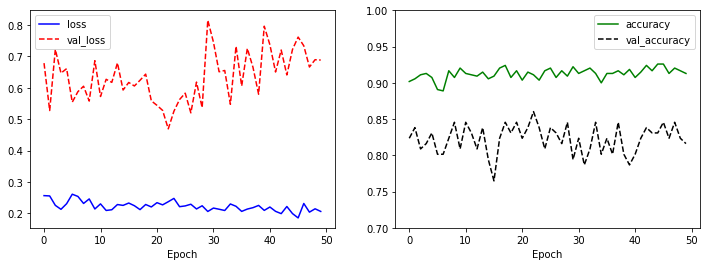

2/2 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.9167
최종 결과 :  [0.32100623846054077, 0.9166666865348816]


In [118]:
epoch_counts = 50
print("클래스 갯수 : " + str(class_counts))
print("에포크 횟수 : " + str(epoch_counts))
history = model.fit(
    x_train,
    y_train,
    epochs=epoch_counts,
    validation_split=0.2
)

 #train loss, validation loss 그래프 출력
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

#train accutacy, validation accuracy 그래프 출력
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()
plt.show()

print("최종 결과 : ", model.evaluate(x_test, y_test))

try:
    json_string = model.to_json()
    open("saved_dnn_model_json.json", "w").write(json_string)
    model.save_weights("saved_dnn_model_weights.h5", overwrite=True)
    with open("dnn_class_names.json", "w") as outfile:
        json.dump({0:"die", 1:"survived"}, outfile)
except Exception as e:
    print("=================================")
    print("=================================")
    print("모델 저장 중 오류가 발생하였습니다!", e)
    print("=================================")
    print("=================================")
